In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from random import randrange

In [2]:
enc = OneHotEncoder()
enc.fit([[0], [1]]) 
def names(number):
    if(number == 0):
        return 'Dog'
    else:
        return 'Cat'

C:\Users\Vee\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
data = []
paths = []
ans = []
for r, d, f in os.walk(r"D:\Downloads\train\train\cat"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    data.append(np.array(x))
    ans.append(enc.transform([[1]]).toarray())

In [4]:
paths = []
for r, d, f in os.walk(r"D:\Downloads\train\train\dog"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    data.append(np.array(x))
    ans.append(enc.transform([[0]]).toarray())

In [5]:
data = np.array(data)
data.shape

(25000, 128, 128, 3)

In [6]:
ans = np.array(ans)
ans = ans.reshape(25000,2)

In [7]:
#splitting data into train and test sets. 3/4 train, 1/4 test.
x_train,x_test,y_train,y_test = train_test_split(data, ans, test_size=0.2, shuffle=True, random_state=69)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)      

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=500, verbose=1,validation_data=(x_test, y_test))


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 13s 667us/step - loss: 0.3030 - val_loss: 0.3650
Epoch 2/10
20000/20000 [==============================] - 10s 511us/step - loss: 0.2551 - val_loss: 0.2610
Epoch 3/10
20000/20000 [==============================] - 10s 512us/step - loss: 0.2216 - val_loss: 0.2079
Epoch 4/10
20000/20000 [==============================] - 10s 523us/step - loss: 0.1971 - val_loss: 0.1987
Epoch 5/10
20000/20000 [==============================] - 11s 535us/step - loss: 0.1730 - val_loss: 0.1822
Epoch 6/10
20000/20000 [==============================] - 11s 526us/step - loss: 0.1578 - val_loss: 0.1647
Epoch 7/10
20000/20000 [==============================] - 10s 522us/step - loss: 0.1428 - val_loss: 0.1625
Epoch 8/10
20000/20000 [==============================] - 10s 520us/step - loss: 0.1303 - val_loss: 0.1500
Epoch 9/10
20000/20000 [==============================] - 10s 519us/step - loss: 0.1141 - val_

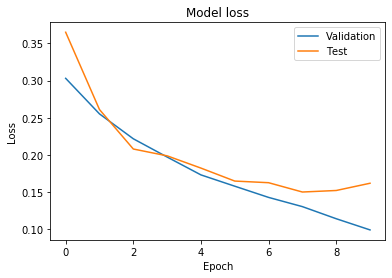

In [10]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Test'], loc='upper right')
plt.show()

55.16189932823181% Confidence This Is A Cat


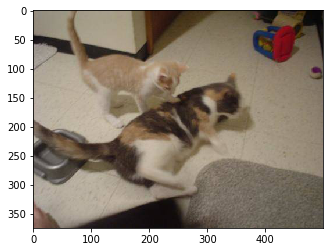

In [92]:
randy = randrange(12500)
path = os.path.join(r'D:\Downloads\test1\test1', str(randy)+'.jpg')
img = Image.open(path)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))

96.3721513748169% Confidence This Is A Cat


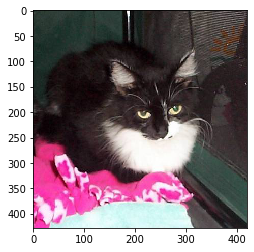

In [93]:
randy = randrange(12500)
path = os.path.join(r'D:\Downloads\test1\test1', str(randy)+'.jpg')
img = Image.open(path)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))

98.34328889846802% Confidence This Is A Cat


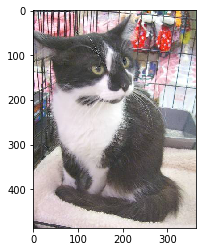

In [94]:
randy = randrange(12500)
path = os.path.join(r'D:\Downloads\test1\test1', str(randy)+'.jpg')
img = Image.open(path)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))

99.08443093299866% Confidence This Is A Cat


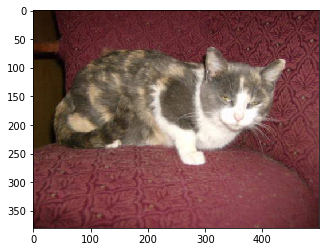

In [95]:
randy = randrange(12500)
path = os.path.join(r'D:\Downloads\test1\test1', str(randy)+'.jpg')
img = Image.open(path)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))

88.59165906906128% Confidence This Is A Dog


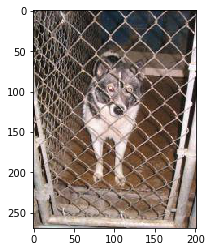

In [96]:
randy = randrange(12500)
path = os.path.join(r'D:\Downloads\test1\test1', str(randy)+'.jpg')
img = Image.open(path)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))

99.98745918273926% Confidence This Is A Cat


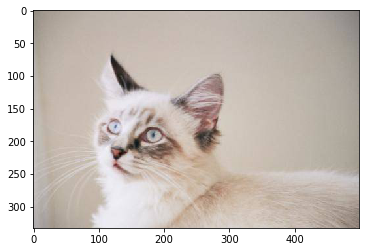

In [97]:
randy = randrange(12500)
path = os.path.join(r'D:\Downloads\test1\test1', str(randy)+'.jpg')
img = Image.open(path)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))

73.4760582447052% Confidence This Is A Dog


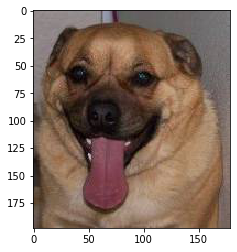

In [98]:
randy = randrange(12500)
path = os.path.join(r'D:\Downloads\test1\test1', str(randy)+'.jpg')
img = Image.open(path)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))

99.75565671920776% Confidence This Is A Cat


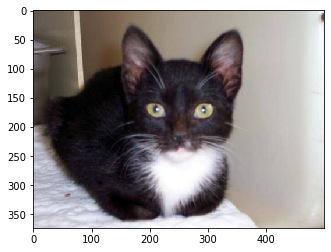

In [99]:
randy = randrange(12500)
path = os.path.join(r'D:\Downloads\test1\test1', str(randy)+'.jpg')
img = Image.open(path)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))

99.39665794372559% Confidence This Is A Dog


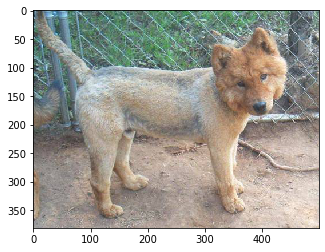

In [100]:
randy = randrange(12500)
path = os.path.join(r'D:\Downloads\test1\test1', str(randy)+'.jpg')
img = Image.open(path)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))

96.82347774505615% Confidence This Is A Dog


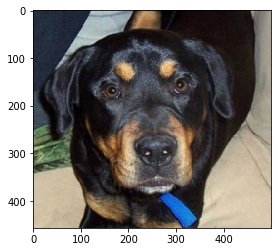

In [101]:
randy = randrange(12500)
path = os.path.join(r'D:\Downloads\test1\test1', str(randy)+'.jpg')
img = Image.open(path)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))

78.01265716552734% Confidence This Is A Cat


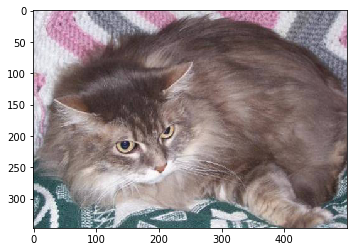

In [102]:
randy = randrange(12500)
path = os.path.join(r'D:\Downloads\test1\test1', str(randy)+'.jpg')
img = Image.open(path)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))

96.96904420852661% Confidence This Is A Dog


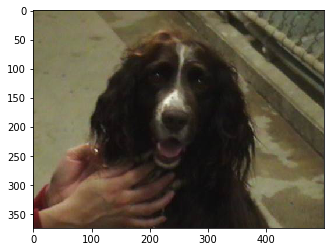

In [103]:
randy = randrange(12500)
path = os.path.join(r'D:\Downloads\test1\test1', str(randy)+'.jpg')
img = Image.open(path)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))